In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
import string 
exclude = string.punctuation
# from wordcloud import WordCloud, STOPWORDS
import spacy

In [ ]:
  
df = pd.read_json(path_or_buf='train.jsonl', lines=True)
df_test = pd.read_json(path_or_buf='test.jsonl', lines=True)
df_dev = pd.read_json(path_or_buf='dev.jsonl', lines=True)

print(df.shape,"train data shape")
print(df_test.shape,"test data shape")

(8544, 3) train data shape
(2210, 3) test data shape


In [ ]:
df.head()

,text,label,label_text
0,"a stirring , funny and finally transporting re...",4,very positive
1,apparently reassembled from the cutting-room f...,1,negative
2,they presume their audience wo n't sit still f...,1,negative
3,the entire movie is filled with deja vu moments .,2,neutral
4,this is a visually stunning rumination on love...,3,positive


In [ ]:
df_test.head()

,text,label,label_text
0,"no movement , no yuks , not much of anything .",1,negative
1,"a gob of drivel so sickly sweet , even the eag...",0,very negative
2,` how many more voyages can this limping but d...,2,neutral
3,so relentlessly wholesome it made me want to s...,2,neutral
4,"gangs of new york is an unapologetic mess , wh...",0,very negative


In [ ]:
## Checking Missing Values
print(df.isnull().sum())
print()
print(df_test.isnull().sum())

text          0
label         0
label_text    0
dtype: int64

text          0
label         0
label_text    0
dtype: int64


In [ ]:
#check duplicates train data
df.duplicated().sum()

10

In [ ]:
#check duplicates test data
df_test.duplicated().sum()

0

In [ ]:
#get list of duplicates 
df[df.duplicated(keep=False)]

,text,label,label_text
31,too bad .,1,negative
1348,too bad .,1,negative
1380,one of the worst movies of the year .,0,very negative
1411,true hollywood story .,2,neutral
1489,see it .,4,very positive
1703,i like it .,3,positive
2167,... a pretentious mess ...,0,very negative
2992,what 's next ?,3,positive
3274,see it .,4,very positive
3379,` stock up on silver bullets for director neil...,3,positive


In [ ]:
##Remove Duplicates
df = df.drop_duplicates(keep='first')
df.head()

,text,label,label_text
0,"a stirring , funny and finally transporting re...",4,very positive
1,apparently reassembled from the cutting-room f...,1,negative
2,they presume their audience wo n't sit still f...,1,negative
3,the entire movie is filled with deja vu moments .,2,neutral
4,this is a visually stunning rumination on love...,3,positive


In [ ]:
df.shape

(8534, 3)

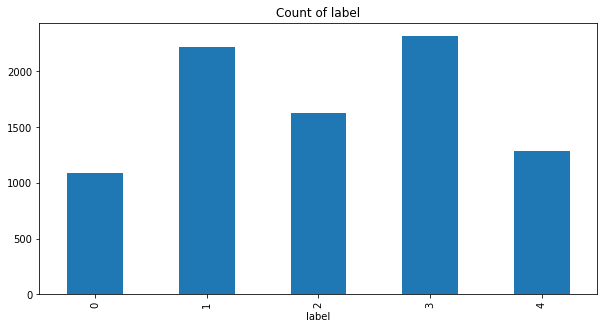

In [ ]:
ax = df['label'].value_counts().sort_index().plot(kind='bar',title='Count of label',figsize=(10, 5))
ax.set_xlabel('label')
plt.show()

In [ ]:
df.duplicated().sum()

0

In [ ]:

df['label'].value_counts()

3    2319
1    2215
2    1623
4    1287
0    1090
Name: label, dtype: int64

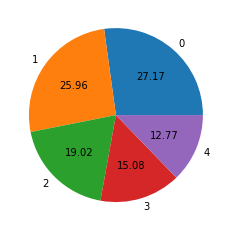

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['0','1','2','3','4'],autopct="%0.2f")
plt.show()

In [ ]:
#lower all the documents
df["text"] = df["text"].str.lower()

In [ ]:
def removal_of_html_tag(text):
    pattern = re.compile("<.*?>")
    return pattern.sub(r'',text)

def remove_url(text):
    pattern = re.compile("r'https?://S+|www\. \S+")
    return pattern.sub(r'',text)

# def Removal_of_special_characters(text):
#     return re.sub('[^A-Za-z0-9]+', ' ', text)

# remove punctuation
def remove(text):
    return text.translate(str.maketrans('','',exclude))


#replacing some abbreviated pronouns with full forms
def remove_abb(data):
    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data = re.sub(r"don\x89Ûªt", "do not", data)
    data= re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I\x89Ûªm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'll", "it will", data)
    data = re.sub(r"we'll", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'll", "he will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'll", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûªll", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not",data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)  
    data = re.sub(r"donå«t", "do not", data)




In [ ]:
df["text"] = df["text"].apply(removal_of_html_tag)
df["text"] = df["text"].apply(remove_url)
df["text"] = df["text"].apply(remove)
df["text"] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords.words('english'))]))

#df['text']=df['text'].apply(lambda z: remove_abb(z))
df.head()

,text,label,label_text
0,stirring funny finally transporting reimaginin...,4,very positive
1,apparently reassembled cuttingroom floor given...,1,negative
2,presume audience wo nt sit still sociology les...,1,negative
3,entire movie filled deja vu moments,2,neutral
4,visually stunning rumination love memory histo...,3,positive


In [ ]:
# import nltk
# nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df_test["text"] = df_test["text"].apply(removal_of_html_tag)
df_test["text"] = df_test["text"].apply(remove_url)
df_test["text"] = df_test["text"].apply(remove)
df_test["text"] = df_test['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords.words('english'))]))
df_test.head()

,text,label,label_text
0,movement yuks much anything,1,negative
1,gob drivel sickly sweet even eager consumers m...,0,very negative
2,many voyages limping dearlyloved franchise sur...,2,neutral
3,relentlessly wholesome made want swipe something,2,neutral
4,gangs new york unapologetic mess whose saving ...,0,very negative


In [ ]:
for i in ['negative', 'positive', 'very negative', 'very positive', 'neutral']:
    df[i] = df['label_text'].apply(lambda x: 1 if i in x else 0)
    df_dev[i] = df_dev['label_text'].apply(lambda x: 1 if i in x else 0)

In [ ]:
df.head()

,text,label,label_text,negative,positive,very negative,very positive,neutral
0,stirring funny finally transporting reimaginin...,4,very positive,0,1,0,1,0
1,apparently reassembled cuttingroom floor given...,1,negative,1,0,0,0,0
2,presume audience wo nt sit still sociology les...,1,negative,1,0,0,0,0
3,entire movie filled deja vu moments,2,neutral,0,0,0,0,1
4,visually stunning rumination love memory histo...,3,positive,0,1,0,0,0


In [ ]:
df_dev.head()

,text,label,label_text,negative,positive,very negative,very positive,neutral
0,"in his first stab at the form , jacquot takes ...",2,neutral,0,0,0,0,1
1,one long string of cliches .,1,negative,1,0,0,0,0
2,if you 've ever entertained the notion of doin...,1,negative,1,0,0,0,0
3,k-19 exploits our substantial collective fear ...,0,very negative,1,0,1,0,0
4,it 's played in the most straight-faced fashio...,1,negative,1,0,0,0,0


In [ ]:
# pip install torchvision 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer

from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
x_train = df['text']
print(len(x_train))
x_test  = df_test['text']
y_train = df['label']
print(len(y_train))
y_test = df_test['label']

8534
8534


In [ ]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3),max_features=3000)
#transformed train reviews
tv_train=tv.fit_transform(x_train).toarray()
#transformed test reviews

tv_test=tv.transform(x_test).toarray()
print('Tfidf_train:',tv_train.shape)
print('Tfidf_test:',tv_test.shape)

Tfidf_train: (8534, 3000)
Tfidf_test: (2210, 3000)


In [ ]:
from lazypredict.Supervised import LazyClassifier

In [ ]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

In [ ]:
models, predictions = clf.fit(tv_train, tv_test, y_train, y_test)

100%|██████████| 29/29 [26:16<00:00, 54.35s/it]


In [ ]:
models #for 3000 feature

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
KNeighborsClassifier,0.18,0.20,None,0.06,4.08
LinearSVC,0.23,0.20,None,0.10,17.94
RandomForestClassifier,0.23,0.20,None,0.10,81.98
NearestCentroid,0.23,0.20,None,0.10,1.10
LogisticRegression,0.23,0.20,None,0.10,11.35
LinearDiscriminantAnalysis,0.23,0.20,None,0.10,30.92
RidgeClassifierCV,0.23,0.20,None,0.10,29.81
RidgeClassifier,0.23,0.20,None,0.10,3.78
ExtraTreesClassifier,0.23,0.20,None,0.10,359.70


In [ ]:
models #for 1000 features

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,0.23,0.20,None,0.09,16.77
LinearSVC,0.23,0.20,None,0.09,5.18
RidgeClassifier,0.23,0.20,None,0.09,0.73
RidgeClassifierCV,0.23,0.20,None,0.09,3.28
NearestCentroid,0.23,0.20,None,0.09,0.35
LogisticRegression,0.23,0.20,None,0.09,2.61
LinearDiscriminantAnalysis,0.23,0.20,None,0.09,3.53
RandomForestClassifier,0.23,0.20,None,0.09,12.66
ExtraTreesClassifier,0.23,0.20,None,0.09,39.45


In [ ]:
from gensim.models import Word2Vec
from tqdm import tqdm

In [ ]:
# Train a basic word2vec model
w2v_model = Word2Vec(x_train,
                                   window=5,
                                   min_count=2)

In [ ]:
# Replace the words in each text message with the learned word vector
words = set(w2v_model.wv.vocab.keys())
#words = w2v_model.wv.vocab.keys()
X_train_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
                         for ls in x_train])
X_test_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
                         for ls in x_test])

In [ ]:
# Average the word vectors for each sentence (and assign a vector of zeros if the model
# did not learn any of the words in the text message during training
X_train_vect_avg = []
for v in X_train_vect:
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))
    else:
        X_train_vect_avg.append(np.zeros(100, dtype=float))
        
X_test_vect_avg = []
for v in X_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(100, dtype=float))

In [ ]:
# What does the unaveraged version look like?
X_train_vect[0]

array([[-0.0149379 , -0.14710198,  0.09465073, ..., -0.27391595,
        -0.2332889 ,  0.07573038],
       [-0.09370468, -0.17326766,  0.22706382, ..., -0.01144299,
        -0.289391  ,  0.05792851],
       [-0.03841925, -0.20154546,  0.24734499, ...,  0.06614051,
        -0.16263764, -0.09315448],
       ...,
       [ 0.20668621, -0.21577714,  0.13808803, ..., -0.1851201 ,
        -0.00156155, -0.23489273],
       [ 0.09951417, -0.13901816,  0.07911815, ..., -0.06648321,
        -0.08920425,  0.09440219],
       [-0.0149379 , -0.14710198,  0.09465073, ..., -0.27391595,
        -0.2332889 ,  0.07573038]], dtype=float32)

In [ ]:
# What does the averaged version look like?
X_train_vect_avg[0]

array([-0.00251439, -0.17457716,  0.17463629, -0.07355373,  0.09412853,
       -0.00925186, -0.05009253,  0.12640843, -0.09486608,  0.00577274,
        0.08712956, -0.1140135 ,  0.17660394,  0.03094955, -0.0250313 ,
       -0.12269709,  0.06897982, -0.00803415, -0.02525837, -0.09040783,
       -0.01352413,  0.10832009, -0.01977667,  0.01249993,  0.11206218,
        0.0637195 ,  0.06492451, -0.11593396, -0.02895947, -0.06000654,
       -0.01014909, -0.04650486,  0.04516105,  0.07397234, -0.08197641,
       -0.05330541,  0.07875443,  0.02622094, -0.08132831,  0.02237459,
        0.0164802 ,  0.06809429,  0.0522175 ,  0.06383163, -0.00679692,
        0.0528967 , -0.01205125,  0.04918759,  0.04537294,  0.07357479,
        0.08678333,  0.04237571, -0.09483113,  0.11053311,  0.02514945,
        0.00485919, -0.17105094,  0.05668078, -0.14403525, -0.04334816,
       -0.10192256,  0.06001348,  0.05180134,  0.06683134, -0.00722417,
       -0.00568173, -0.1694506 , -0.11855891,  0.04895712, -0.14

In [ ]:
# Instantiate and fit a basic Random Forest model on top of the vectors
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf_model = rf.fit(X_train_vect_avg, y_train.values.ravel())

In [ ]:
# Use the trained model to make predictions on the test data
y_pred = rf_model.predict(X_test_vect_avg)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.17      0.02      0.04       279
           1       0.31      0.43      0.36       633
           2       0.17      0.09      0.12       389
           3       0.26      0.50      0.34       510
           4       0.30      0.07      0.11       399

    accuracy                           0.27      2210
   macro avg       0.24      0.22      0.19      2210
weighted avg       0.25      0.27      0.23      2210

